<a href="https://colab.research.google.com/github/mrudulamadhavan/Mrudula_Scifor/blob/main/Deep%20Learning/YOLO_Algorithm_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **YOLO Algorithm Implementation for Object Detection**

The script requires four input arguments.

* input image
* YOLO config file
* pre-trained YOLO weights
* text file containing class names




In [1]:
!pip install opencv-python

In [2]:
!wget "https://pjreddie.com/media/files/yolov3.weights"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

!wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

--2024-04-03 10:37:56--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  19.6MB/s    in 10s     

2024-04-03 10:38:24 (23.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]

--2024-04-03 10:38:24--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2

In [3]:
# pip install ipywidgets pillow


In [4]:
from IPython.display import display
import ipywidgets as widgets
from io import BytesIO
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load YOLO
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Function to get output layer names
def get_output_layers(net):
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]
    return output_layers

FileUpload(value={}, accept='image/*', description='Upload')

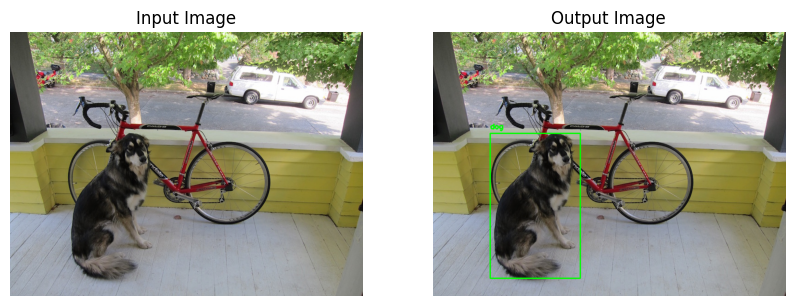

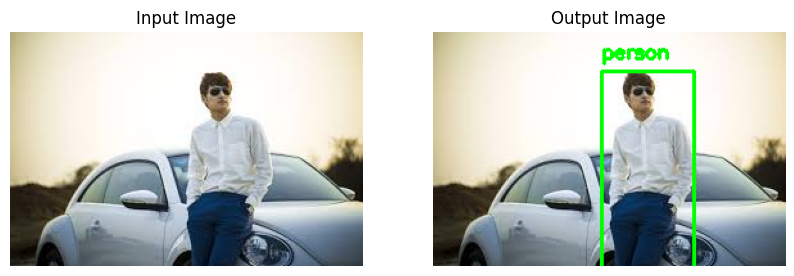

In [7]:
# Define the draw_bounding_box function
def draw_bounding_box(img, class_id, confidence, x, y, x_plus_w, y_plus_h, label):
    color = (0,255,0)
    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)
    cv2.putText(img, label, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Define the on_upload function
def on_upload(change):
    uploaded_file = list(file_upload.value.values())[0]  # Extract the uploaded file
    image = Image.open(BytesIO(uploaded_file['content']))
    image_np = np.array(image)

    # Preprocess image
    blob = cv2.dnn.blobFromImage(image_np, 0.00392, (416,416), (0,0,0), True, crop=False)

    # Set input to the network
    net.setInput(blob)

    # Run forward pass through the network
    outs = net.forward(get_output_layers(net))

    # Find the detection with highest confidence
    max_confidence = 0
    best_detection = None
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5 and confidence > max_confidence:
                max_confidence = confidence
                best_detection = detection

    # Process best detection
    if best_detection is not None:
        scores = best_detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        center_x = int(best_detection[0] * image_np.shape[1])
        center_y = int(best_detection[1] * image_np.shape[0])
        w = int(best_detection[2] * image_np.shape[1])
        h = int(best_detection[3] * image_np.shape[0])
        x = center_x - w / 2
        y = center_y - h / 2
        label = str(classes[class_id])
        draw_bounding_box(image_np, class_id, confidence, int(x), int(y), int(x+w), int(y+h), label)

    # Display the input and output images in a subplot
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image)
    ax[0].set_title('Input Image')
    ax[0].axis('off')

    ax[1].imshow(image_np)
    ax[1].set_title('Output Image')
    ax[1].axis('off')

    plt.show()

# Create the file upload widget
file_upload = widgets.FileUpload(accept='image/*', multiple=False)
file_upload.observe(on_upload, names='_counter')

# Display the file upload widget
display(file_upload)